# Creating the Gene Table
This notebook is copied from the [Pymodulon GitHub repository](https://github.com/SBRG/pymodulon/blob/master/docs/tutorials/creating_the_gene_table.ipynb)

In [28]:
from pymodulon.gene_util import *
import os

## Get information from GFF files

First, download the FASTA and GFF files for your organism and its plasmids from NCBI.

Enter the location of all your GFF files here:

In [2]:
gff_files = [os.path.join('..','Species','Synechocystis_sp_PCC_6803','sequence_files','genome.gff3'),
             os.path.join('..','Species','Synechocystis_sp_PCC_6803','sequence_files','plasmid_pSYSA.gff3'),
             os.path.join('..','Species','Synechocystis_sp_PCC_6803','sequence_files','plasmid_pSYSG.gff3'),
             os.path.join('..','Species','Synechocystis_sp_PCC_6803','sequence_files','plasmid_pSYSM.gff3'),
             os.path.join('..','Species','Synechocystis_sp_PCC_6803','sequence_files','plasmid_pSYSX.gff3')]

The following cell will convert all the GFF files into a single Pandas DataFrame for easy manipulation. Pseudogenes have multiple rows in a GFF file (one for each fragment), but only the first fragment will be kept.

In [3]:
keep_cols = ['accession','start','end','strand','gene_name','old_locus_tag','gene_product','ncbi_protein']

DF_annot = gff2pandas(gff_files,index='locus_tag')
DF_annot = DF_annot[keep_cols]

DF_annot.head()

,accession,start,end,strand,gene_name,old_locus_tag,gene_product,ncbi_protein
locus_tag,,,,,,,,
SGL_RS01880,NC_000911.1,811,1494,+,None,slr0612,pseudouridine synthase,WP_020861325.1
SGL_RS01885,NC_000911.1,1577,2098,+,None,slr0613,hypothetical protein,WP_010871209.1
SGL_RS01890,NC_000911.1,2172,2873,-,None,sll0558,GUN4 domain-containing protein,WP_010871210.1
SGL_RS01895,NC_000911.1,3192,4268,-,acsF,sll1214,magnesium-protoporphyrin IX monomethyl ester (...,WP_010871211.1
SGL_RS01900,NC_000911.1,4451,5389,-,None,sll1213,GDP-L-fucose synthase,WP_010871212.1


To ensure that the gene index used is identical to the expression matrix, load in your data.

In [4]:
log_tpm_file = os.path.join('..','Species','Synechocystis_sp_PCC_6803','log_tpm.csv')
DF_log_tpm = pd.read_csv(log_tpm_file,index_col=0)
DF_log_tpm.head()

,SRX12668170,SRX12668171,SRX12668172,SRX12668179,SRX12668183,SRX12668188,SRX12668189,SRX12668194,SRX12668195,SRX12668196,...,SRX9895142,SRX9895143,SRX9895144,SRX9895145,SRX9848492,SRX9848493,SRX9848502,SRX9848503,SRX9848504,SRX9848505
Geneid,,,,,,,,,,,,,,,,,,,,,
SGL_RS01880,5.050498,4.822078,4.813050,5.166668,4.516703,5.186998,5.201185,5.525648,5.344518,4.747275,...,4.026042,3.022737,3.502312,3.364339,2.375611,1.959287,2.391862,2.040233,2.096001,2.746660
SGL_RS01885,6.877468,6.587161,6.855133,7.162296,6.771085,6.601193,6.925857,6.989453,7.013504,6.608305,...,7.625522,7.374933,7.436060,6.906705,5.379352,4.990329,4.966682,5.371024,5.430836,5.758562
SGL_RS01890,6.768408,6.721750,6.686568,7.035368,6.674603,6.855485,6.982362,6.820151,6.553323,6.577139,...,6.765712,7.008717,6.999221,6.384225,4.925588,5.500913,5.423294,5.796995,6.118251,6.229139
SGL_RS01895,10.207298,10.174856,10.050620,10.106709,9.986760,9.884936,9.784358,10.025575,10.095805,9.852926,...,8.655906,8.075301,8.241731,8.419162,7.108838,7.377096,7.134002,7.762221,7.934041,7.817227
SGL_RS01900,8.565986,8.564767,8.579692,8.676250,8.408261,8.304192,8.374080,8.424863,8.455467,8.189889,...,4.521566,4.564990,4.487548,4.595571,4.751701,4.955141,4.944198,4.908169,5.113447,5.176185


Check that the genes are the same in the expression dataset as in the annotation dataframe. Mismatched genes are listed below.

In [5]:
test = DF_annot.sort_index().index == DF_log_tpm.sort_index().index
DF_annot[~test]

,accession,start,end,strand,gene_name,old_locus_tag,gene_product,ncbi_protein
locus_tag,,,,,,,,


## (Optional) KEGG and COGs

### Generate nucleotide fasta files for CDS

Enter the location of all your fasta files here:

In [6]:
fasta_files = [os.path.join('..','Species','Synechocystis_sp_PCC_6803','sequence_files','genome.fasta'),
               os.path.join('..','Species','Synechocystis_sp_PCC_6803','sequence_files','plasmid_pSYSA.fasta'),
               os.path.join('..','Species','Synechocystis_sp_PCC_6803','sequence_files','plasmid_pSYSG.fasta'),
               os.path.join('..','Species','Synechocystis_sp_PCC_6803','sequence_files','plasmid_pSYSM.fasta'),
               os.path.join('..','Species','Synechocystis_sp_PCC_6803','sequence_files','plasmid_pSYSX.fasta')]

The following code generates CDS files using your FASTA and GFF3 files

In [7]:
from Bio import SeqIO

cds_list = []
for fasta in fasta_files:
    seq = SeqIO.read(fasta,'fasta')

    # Get gene information for genes in this fasta file
    df_genes = DF_annot[DF_annot.accession == seq.id]
    
    for i,row in df_genes.iterrows():
        cds = seq[row.start-1:row.end]
        if row.strand == '-':
            cds = seq[row.start-1:row.end].reverse_complement()
        cds.id = row.name
        cds.description = row.gene_name if pd.notnull(row.gene_name) else row.name
        cds_list.append(cds)

In [8]:
cds_list[:5]

[SeqRecord(seq=Seq('TTGAATAAAACTCCCCAAACCATTGTTTTTTACAAACCCTACGGAGTTCTGTGT...TGA'), id='SGL_RS01880', name='NC_000911.1', description='SGL_RS01880', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGTCCTATCTAATCGCTGTGGTAGCCAACCGCATTGCCGCCGAAGAAGCTTAT...TGA'), id='SGL_RS01885', name='NC_000911.1', description='SGL_RS01885', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGTCTGATAATTTGACCGAACTCTCCCAACAACTCCATGATGCTTCAGAAAAA...TAA'), id='SGL_RS01890', name='<unknown name>', description='SGL_RS01890', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGTTAATACCCTCGAAAAGCCCGGATTTGATGAAATCCGTCCCGGTGTCAAG...TAA'), id='SGL_RS01895', name='<unknown name>', description='acsF', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGCTTTCCCTAGAAAATCAACGTATTTTGGTCACTGGCGGGGCCGGTTTCCTC...TAA'), id='SGL_RS01900', name='<unknown name>', description='SGL_RS01900', dbxrefs=[])]

Save the CDS file

In [10]:
cds_file = os.path.join('..','Species','Synechocystis_sp_PCC_6803','computed_data','CDS.fna')
SeqIO.write(cds_list, cds_file, 'fasta')

3690

### Run EggNOG Mapper
1. Go to http://eggnog-mapper.embl.de/.
1. Upload the CDS.fna file from your organism directory (within the sequence_files folder)
1. Make sure to limit the taxonomy to the correct level
1. After the job is submitted, you must follow the link in your email to run the job.
1. Once the job completes (after ~4 hrs), download the annotations file.
1. Save the annotation file

### Get KEGG IDs

Once you have the EggNOG annotations, load the annotation file

In [12]:
eggnog_file = os.path.join('..','data','external','eggNOG_annotations.txt')

In [13]:
DF_eggnog = pd.read_csv(eggnog_file,sep='\t',skiprows=4,header=None)
eggnog_cols = ['query_name','seed eggNOG ortholog','seed ortholog evalue','seed ortholog score',
               'Predicted taxonomic group','Predicted protein name','Gene Ontology terms',
               'EC number','KEGG_orth','KEGG_pathway','KEGG_module','KEGG_reaction',
               'KEGG_rclass','BRITE','KEGG_TC','CAZy','BiGG Reaction','tax_scope',
               'eggNOG OGs','bestOG_deprecated','COG','eggNOG free text description']

DF_eggnog.columns = eggnog_cols

# Strip last three rows as they are comments
DF_eggnog = DF_eggnog.iloc[:-3]

# Set locus tag as index
DF_eggnog = DF_eggnog.set_index('query_name')
DF_eggnog.index.name = 'locus_tag'

DF_eggnog.head()

,seed eggNOG ortholog,seed ortholog evalue,seed ortholog score,Predicted taxonomic group,Predicted protein name,Gene Ontology terms,EC number,KEGG_orth,KEGG_pathway,KEGG_module,...,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG Reaction,tax_scope,eggNOG OGs,bestOG_deprecated,COG,eggNOG free text description
locus_tag,,,,,,,,,,,,,,,,,,,,,
BSU_00010,224308.BSU00010,1.300000e-251,875.2,Bacillus,dnaA,"GO:0003674,GO:0003676,GO:0003677,GO:0003688,GO...",NaN,ko:K02313,"ko02020,ko04112,map02020,map04112",NaN,...,NaN,"ko00000,ko00001,ko03032,ko03036",NaN,NaN,NaN,Bacillus,"1TPV7@1239,1ZBKI@1386,4H9MW@91061,COG0593@1,CO...",NA|NA|NA,L,it binds specifically double-stranded DNA at a...
BSU_00020,224308.BSU00020,1.000000e-204,719.2,Bacillus,dnaN,NaN,2.7.7.7,ko:K02338,"ko00230,ko00240,ko01100,ko03030,ko03430,ko0344...",M00260,...,RC02795,"ko00000,ko00001,ko00002,ko01000,ko03032,ko03400",NaN,NaN,NaN,Bacillus,"1TQ7J@1239,1ZAVV@1386,4H9TF@91061,COG0592@1,CO...",NA|NA|NA,L,Confers DNA tethering and processivity to DNA ...
BSU_00030,224308.BSU00030,4.000000e-33,146.7,Bacillus,yaaA,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bacillus,"1VEJ2@1239,1ZIXZ@1386,4HNMC@91061,COG2501@1,CO...",NA|NA|NA,S,S4 domain
BSU_00040,224308.BSU00040,2.400000e-206,724.5,Bacillus,recF,"GO:0000731,GO:0005575,GO:0005622,GO:0005623,GO...",NaN,ko:K03629,"ko03440,map03440",NaN,...,NaN,"ko00000,ko00001,ko03400",NaN,NaN,NaN,Bacillus,"1TP9U@1239,1ZC8V@1386,4HA0W@91061,COG1195@1,CO...",NA|NA|NA,L,it is required for DNA replication and normal ...
BSU_00050,224308.BSU00050,4.000000e-37,160.2,Bacillus,yaaB,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bacillus,"1VEZV@1239,1ZIZ5@1386,2E36Q@1,32Y6E@2,4HQTK@91061",NA|NA|NA,S,Domain of unknown function (DUF370)


Now we will pull the KEGG information from the eggNOG file, including orthology, pathway, module, and reactions for each gene.

In [14]:
DF_kegg = DF_eggnog[['KEGG_orth','KEGG_pathway','KEGG_module','KEGG_reaction']]

# Melt dataframe
DF_kegg = DF_kegg.reset_index().melt(id_vars='locus_tag') 

# Remove null values
DF_kegg = DF_kegg[DF_kegg.value.notnull()]

# Split comma-separated values into their own rows
list2struct = []
for name,row in DF_kegg.iterrows():
    for val in row.value.split(','):
        list2struct.append([row.locus_tag,row.variable,val])

DF_kegg = pd.DataFrame(list2struct,columns=['gene_id','database','kegg_id'])

# Remove ko entries, as only map entries are searchable in KEGG pathway
DF_kegg = DF_kegg[~DF_kegg.kegg_id.str.startswith('ko')]

DF_kegg.head()

,gene_id,database,kegg_id
2553,BSU_00010,KEGG_pathway,map02020
2554,BSU_00010,KEGG_pathway,map04112
2561,BSU_00020,KEGG_pathway,map00230
2562,BSU_00020,KEGG_pathway,map00240
2563,BSU_00020,KEGG_pathway,map01100


### Save KEGG information

In [15]:
DF_kegg.to_csv(os.path.join('..','data','external','kegg_mapping.csv'))

### Save COGs to annotation dataframe

In [16]:
DF_annot['COG'] = DF_eggnog.COG

# Make sure COG only has one entry per gene
DF_annot['COG'] = [item[0] if isinstance(item,str) else item for item in DF_annot['COG']]

## Uniprot ID mapping

The ``uniprot_id_mapping`` function is a python wrapper for the [Uniprot ID mapping tool](https://www.uniprot.org/uploadlists/). Use ``input_id=P_REFSEQ_AC`` if the FASTA/GFF files are from RefSeq, and ``input_id=EMBL`` if the files are from Genbank.

In [43]:
import re
import time
import json
import zlib
from xml.etree import ElementTree
from urllib.parse import urlparse, parse_qs, urlencode
import requests
from requests.adapters import HTTPAdapter, Retry


POLLING_INTERVAL = 3
API_URL = "https://rest.uniprot.org"


retries = Retry(total=5, backoff_factor=0.25, status_forcelist=[500, 502, 503, 504])
session = requests.Session()
session.mount("https://", HTTPAdapter(max_retries=retries))


def check_response(response):
    try:
        response.raise_for_status()
    except requests.HTTPError:
        print(response.json())
        raise


def submit_id_mapping(from_db, to_db, ids):
    request = requests.post(
        f"{API_URL}/idmapping/run",
        data={"from": from_db, "to": to_db, "ids": ",".join(ids)},
    )
    check_response(request)
    return request.json()["jobId"]


def get_next_link(headers):
    re_next_link = re.compile(r'<(.+)>; rel="next"')
    if "Link" in headers:
        match = re_next_link.match(headers["Link"])
        if match:
            return match.group(1)


def check_id_mapping_results_ready(job_id):
    while True:
        request = session.get(f"{API_URL}/idmapping/status/{job_id}")
        check_response(request)
        j = request.json()
        if "jobStatus" in j:
            if j["jobStatus"] == "RUNNING":
                print(f"Retrying in {POLLING_INTERVAL}s")
                time.sleep(POLLING_INTERVAL)
            else:
                raise Exception(j["jobStatus"])
        else:
            return bool(j["results"] or j["failedIds"])


def get_batch(batch_response, file_format, compressed):
    batch_url = get_next_link(batch_response.headers)
    while batch_url:
        batch_response = session.get(batch_url)
        batch_response.raise_for_status()
        yield decode_results(batch_response, file_format, compressed)
        batch_url = get_next_link(batch_response.headers)


def combine_batches(all_results, batch_results, file_format):
    if file_format == "json":
        for key in ("results", "failedIds"):
            if key in batch_results and batch_results[key]:
                all_results[key] += batch_results[key]
    elif file_format == "tsv":
        return all_results + batch_results[1:]
    else:
        return all_results + batch_results
    return all_results


def get_id_mapping_results_link(job_id):
    url = f"{API_URL}/idmapping/details/{job_id}"
    request = session.get(url)
    check_response(request)
    return request.json()["redirectURL"]


def decode_results(response, file_format, compressed):
    if compressed:
        decompressed = zlib.decompress(response.content, 16 + zlib.MAX_WBITS)
        if file_format == "json":
            j = json.loads(decompressed.decode("utf-8"))
            return j
        elif file_format == "tsv":
            return [line for line in decompressed.decode("utf-8").split("\n") if line]
        elif file_format == "xlsx":
            return [decompressed]
        elif file_format == "xml":
            return [decompressed.decode("utf-8")]
        else:
            return decompressed.decode("utf-8")
    elif file_format == "json":
        return response.json()
    elif file_format == "tsv":
        return [line for line in response.text.split("\n") if line]
    elif file_format == "xlsx":
        return [response.content]
    elif file_format == "xml":
        return [response.text]
    return response.text


def get_xml_namespace(element):
    m = re.match(r"\{(.*)\}", element.tag)
    return m.groups()[0] if m else ""


def merge_xml_results(xml_results):
    merged_root = ElementTree.fromstring(xml_results[0])
    for result in xml_results[1:]:
        root = ElementTree.fromstring(result)
        for child in root.findall("{http://uniprot.org/uniprot}entry"):
            merged_root.insert(-1, child)
    ElementTree.register_namespace("", get_xml_namespace(merged_root[0]))
    return ElementTree.tostring(merged_root, encoding="utf-8", xml_declaration=True)


def print_progress_batches(batch_index, size, total):
    n_fetched = min((batch_index + 1) * size, total)
    print(f"Fetched: {n_fetched} / {total}")


def get_id_mapping_results_search(url):
    parsed = urlparse(url)
    query = parse_qs(parsed.query)
    file_format = query["format"][0] if "format" in query else "json"
    if "size" in query:
        size = int(query["size"][0])
    else:
        size = 500
        query["size"] = size
    compressed = (
        query["compressed"][0].lower() == "true" if "compressed" in query else False
    )
    parsed = parsed._replace(query=urlencode(query, doseq=True))
    url = parsed.geturl()
    request = session.get(url)
    check_response(request)
    results = decode_results(request, file_format, compressed)
    total = int(request.headers["x-total-results"])
    print_progress_batches(0, size, total)
    for i, batch in enumerate(get_batch(request, file_format, compressed), 1):
        results = combine_batches(results, batch, file_format)
        print_progress_batches(i, size, total)
    if file_format == "xml":
        return merge_xml_results(results)
    return results


def get_id_mapping_results_stream(url):
    if "/stream/" not in url:
        url = url.replace("/results/", "/results/stream/")
    request = session.get(url)
    check_response(request)
    parsed = urlparse(url)
    query = parse_qs(parsed.query)
    file_format = query["format"][0] if "format" in query else "json"
    compressed = (
        query["compressed"][0].lower() == "true" if "compressed" in query else False
    )
    return decode_results(request, file_format, compressed)


job_id = submit_id_mapping(
    from_db="RefSeq_Protein", to_db="UniProtKB", ids=DF_annot.ncbi_protein.fillna('').tolist()
)
if check_id_mapping_results_ready(job_id):
    link = get_id_mapping_results_link(job_id)
    results = get_id_mapping_results_search(link)
    # Equivalently using the stream endpoint which is more demanding
    # on the API and so is less stable:
    # results = get_id_mapping_results_stream(link)

Retrying in 3s
Retrying in 3s
Retrying in 3s
Retrying in 3s
Retrying in 3s
Fetched: 500 / 527
Fetched: 527 / 527


In [55]:
uniprot_mapping_result = pd.DataFrame.from_dict({ 'ncbi_protein' : [ result['from'] for result in results['results'] ],
                                                  'uniprot' : [ result['to']['uniProtkbId'] for result in results['results'] ]
                                                })

uniprot_mapping_result.head()

,ncbi_protein,uniprot
0,WP_010871253.1,A0A6P1VBG6_9SYNC
1,WP_010871269.1,A0A6P1VGH8_9SYNC
2,WP_010871276.1,A0A6P1VAP5_9SYNC
3,WP_010871281.1,A0A6P1VGI7_9SYNC
4,WP_010871309.1,A0A6P1VFU6_9SYNC


In [52]:
DF_annot

,accession,start,end,strand,gene_name,old_locus_tag,gene_product,ncbi_protein
locus_tag,,,,,,,,
SGL_RS01880,NC_000911.1,811,1494,+,None,slr0612,pseudouridine synthase,WP_020861325.1
SGL_RS01885,NC_000911.1,1577,2098,+,None,slr0613,hypothetical protein,WP_010871209.1
SGL_RS01890,NC_000911.1,2172,2873,-,None,sll0558,GUN4 domain-containing protein,WP_010871210.1
SGL_RS01895,NC_000911.1,3192,4268,-,acsF,sll1214,magnesium-protoporphyrin IX monomethyl ester (...,WP_010871211.1
SGL_RS01900,NC_000911.1,4451,5389,-,None,sll1213,GDP-L-fucose synthase,WP_010871212.1
...,...,...,...,...,...,...,...,...
SGL_RS01855,NC_005232.1,100603,101829,+,None,slr6106,AIPR family protein,WP_011153899.1
SGL_RS01860,NC_005232.1,102151,102672,+,None,slr6107,CAP domain-containing protein,WP_011153900.1
SGL_RS01865,NC_005232.1,102911,103720,+,None,slr6108,NERD domain-containing protein,WP_011153901.1


In [56]:
# Merge with current annotation
DF_annot = pd.merge(DF_annot.reset_index(),uniprot_mapping_result,how='left',on='ncbi_protein')
DF_annot.set_index('locus_tag',inplace=True)
DF_annot.head()

,accession,start,end,strand,gene_name,old_locus_tag,gene_product,ncbi_protein,uniprot
locus_tag,,,,,,,,,
SGL_RS01880,NC_000911.1,811,1494,+,None,slr0612,pseudouridine synthase,WP_020861325.1,NaN
SGL_RS01885,NC_000911.1,1577,2098,+,None,slr0613,hypothetical protein,WP_010871209.1,NaN
SGL_RS01890,NC_000911.1,2172,2873,-,None,sll0558,GUN4 domain-containing protein,WP_010871210.1,NaN
SGL_RS01895,NC_000911.1,3192,4268,-,acsF,sll1214,magnesium-protoporphyrin IX monomethyl ester (...,WP_010871211.1,NaN
SGL_RS01900,NC_000911.1,4451,5389,-,None,sll1213,GDP-L-fucose synthase,WP_010871212.1,NaN


In [58]:
len(DF_annot.uniprot.unique())

528

In [81]:
len(DF_annot)

3742

## Add Biocyc Operon information

To obtain operon information from Biocyc, follow the steps below

1. Go to [Biocyc.org](https://biocyc.org/) (you may need to create an account and/or login)
2. Change the organism database to your organism/strain
3. Select **SmartTables** -> **Special SmartTables**
4. Select **"All genes of \<organism\>"**
5. Select the **"Gene Name"** column
6. Under **"ADD TRANSFORM COLUMN"** select **"Genes in same transcription unit"**
7. Select the **"Genes in same transcription unit"** column
8. Under **"ADD PROPERTY COLUMN"** select **"Accession-1"**
9. Under **OPERATIONS**, select **"Export"** -> **"to Spreadsheet File..."**
10. Select **"common names"** and click **"Export smarttable"**
11. Add file location below and run the code cell

In [72]:
biocyc_file = os.path.join('..','Species','Synechocystis_sp_PCC_6803','external','biocyc_annotations.txt')

DF_biocyc = pd.read_csv(biocyc_file,sep='\t')

# Remove genes with no accession
DF_biocyc = DF_biocyc[DF_biocyc['Accession-1'].notnull()]

# Set the accession (i.e. locus tag) as index
DF_biocyc = DF_biocyc.set_index('Accession-1').sort_values('Left-End-Position')

# Specific for B. subtilis: Fix locus tags
#DF_biocyc.index = DF_biocyc.index.str.replace('BSU','BSU_')

# Only keep genes in the final annotation file
DF_biocyc = DF_biocyc.reindex(DF_annot.old_locus_tag)

# Reformat transcription units
DF_biocyc['operon_list'] = DF_biocyc['Accession-1.1'].apply(reformat_biocyc_tu)

# Fill None with locus tags
DF_biocyc['operon_list'].fillna(DF_biocyc.index.to_series(), inplace=True)

DF_biocyc

,Gene Name,Left-End-Position,Right-End-Position,Product,Genes in same transcription unit,Accession-1.1,operon_list
old_locus_tag,,,,,,,
slr0612,slr0612,811.0,1494.0,pseudouridine synthase,slr0612,slr0612,slr0612
slr0613,slr0613,1577.0,2098.0,hypothetical protein,slr0613,slr0613,slr0613
sll0558,sll0558,2172.0,2873.0,GUN4 domain-containing protein,sll0558,sll0558,sll0558
sll1214,acsF,3192.0,4268.0,magnesium-protoporphyrin IX monomethyl ester (...,acsF,sll1214,sll1214
sll1213,fcl,4451.0,5389.0,GDP-L-fucose synthase,gmd // fcl,sll1212 // sll1213,sll1212;sll1213
...,...,...,...,...,...,...,...
slr6106,slr6106,100603.0,101829.0,AIPR family protein,slr6106,slr6106,slr6106
slr6107,slr6107,102151.0,102672.0,CAP domain-containing protein,slr6107,slr6107,slr6107
slr6108,slr6108,102911.0,103720.0,hypothetical protein,slr6108,slr6108,slr6108


### Assign unique IDs to operons

The following code assigns unique names to each operon

In [73]:
# Get all operons
operons = DF_biocyc['operon_list'].unique()

# Map each operon to a unique string
operon_dict = {operon: "Op"+str(i) for i, operon in enumerate(operons)}

# Add names to dataframe
DF_biocyc['operon'] = [operon_dict[op] for op in DF_biocyc["operon_list"]]

DF_biocyc.head()

,Gene Name,Left-End-Position,Right-End-Position,Product,Genes in same transcription unit,Accession-1.1,operon_list,operon
old_locus_tag,,,,,,,,
slr0612,slr0612,811.0,1494.0,pseudouridine synthase,slr0612,slr0612,slr0612,Op0
slr0613,slr0613,1577.0,2098.0,hypothetical protein,slr0613,slr0613,slr0613,Op1
sll0558,sll0558,2172.0,2873.0,GUN4 domain-containing protein,sll0558,sll0558,sll0558,Op2
sll1214,acsF,3192.0,4268.0,magnesium-protoporphyrin IX monomethyl ester (...,acsF,sll1214,sll1214,Op3
sll1213,fcl,4451.0,5389.0,GDP-L-fucose synthase,gmd // fcl,sll1212 // sll1213,sll1212;sll1213,Op4


Finally, merge the Biocyc information with the main annotation DataFrame

In [82]:
DF_annot = DF_annot.set_index('old_locus_tag')
DF_annot['operon'] = DF_biocyc['operon']

## Clean up and save annotation

First, we will re-order the annotation columns

In [103]:
if 'old_locus_tag' in DF_annot.columns:
    order = ['gene_name','accession','old_locus_tag','start','end','strand','gene_product','uniprot','operon']
else:
    order = ['gene_name','accession','start','end','strand','gene_product','uniprot','operon']
    
DF_annot = DF_annot[order]

In [104]:
DF_annot.head()

,gene_name,accession,start,end,strand,gene_product,uniprot,operon
old_locus_tag,,,,,,,,
slr0612,None,NC_000911.1,811,1494,+,pseudouridine synthase,NaN,Op0
slr0613,None,NC_000911.1,1577,2098,+,hypothetical protein,NaN,Op1
sll0558,None,NC_000911.1,2172,2873,-,GUN4 domain-containing protein,NaN,Op2
sll1214,acsF,NC_000911.1,3192,4268,-,magnesium-protoporphyrin IX monomethyl ester (...,NaN,Op3
sll1213,None,NC_000911.1,4451,5389,-,GDP-L-fucose synthase,NaN,Op4


## Final statistics

The following graphs show how much information is available for the organism.

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('ticks')

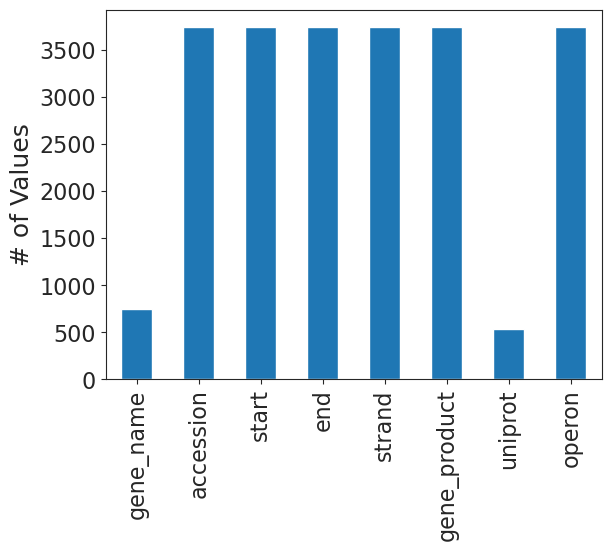

In [107]:
fig,ax = plt.subplots()
DF_annot.count().plot(kind='bar',ax=ax)
ax.set_ylabel('# of Values',fontsize=18)
ax.tick_params(labelsize=16)

## Fill missing values

Some organisms are missing gene names, so these will be filled with locus tag gene names.

In [108]:
# Fill in missing gene names with locus tag names
DF_annot['tmp_name'] = DF_annot.copy().index.tolist()
DF_annot.gene_name.fillna(DF_annot.tmp_name,inplace=True)
DF_annot.drop('tmp_name',axis=1,inplace=True)

 COG letters will also be converted to the full name.

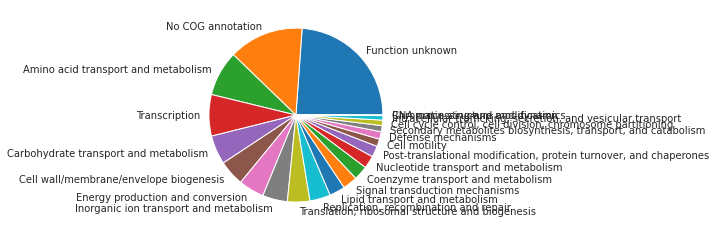

In [28]:
# Fill missing COGs with X
DF_annot['COG'].fillna('X',inplace=True)

# Change single letter COG annotation to full description
DF_annot['COG'] = DF_annot.COG.apply(cog2str)

counts = DF_annot.COG.value_counts()
plt.pie(counts.values,labels=counts.index);

Uncomment the following line to save the gene annotation dataset

In [109]:
DF_annot.to_csv(os.path.join('..','Species','Synechocystis_sp_PCC_6803','computed_data','gene_info.csv'))

## GO Annotations

To start, download the GO Annotations for your organism from AmiGO 2

1. Go to [AmiGO 2](http://amigo.geneontology.org/amigo/search/annotation)
1. Filter for your organism
1. Click ``CustomDL``
1. Drag ``GO class (direct)`` to the end of your Selected Fields
1. Enter the location of your GO annotation file below and run the following code block

In [110]:
go_file = os.path.join('..','Species','Synechocystis_sp_PCC_6803','external','GO_annotations.txt')

In [111]:
DF_GO = pd.read_csv(go_file,sep='\t',header=None,usecols=[2,17])
DF_GO.columns = ['gene_name','gene_ontology']
DF_GO.head()

,gene_name,gene_ontology
0,slr0786,cytosol
1,slr0786,metalloaminopeptidase activity
2,slr0786,protein initiator methionine removal
3,sll0537,ammonium homeostasis
4,sll0537,ammonium transmembrane transport


Convert the gene names to gene locus tags, and drop gene names that cannot be converted

In [113]:
name2num = {v:k for k,v in DF_annot.gene_name.to_dict().items()}

In [115]:
DF_GO['gene_id'] = [name2num[x] if x in name2num.keys() else None for x in DF_GO.gene_name]

In [116]:
DF_GO.head()

,gene_name,gene_ontology,gene_id
0,slr0786,cytosol,None
1,slr0786,metalloaminopeptidase activity,None
2,slr0786,protein initiator methionine removal,None
3,sll0537,ammonium homeostasis,sll0537
4,sll0537,ammonium transmembrane transport,sll0537


Now we remove null entries

In [117]:
DF_GO = DF_GO[DF_GO.gene_id.notnull()]

In [118]:
DF_GO.head()

,gene_name,gene_ontology,gene_id
3,sll0537,ammonium homeostasis,sll0537
4,sll0537,ammonium transmembrane transport,sll0537
5,sll0601,N-carbamoylputrescine amidase activity,sll0601
6,sll0601,putrescine biosynthetic process from arginine,sll0601
7,gltS,glutamate synthase (NADH) activity,slr1145


Uncomment the line below to save the annotations

In [119]:
DF_GO[['gene_id','gene_name','gene_ontology']].to_csv(os.path.join('..','Species','Synechocystis_sp_PCC_6803','external','GO_annotations_curated.csv'))